Use kernel 11.20_progress

In [901]:
null=adata.copy()

In [903]:
del null.X

In [905]:
del null.layers

In [910]:
del null.raw

In [912]:
del null.var

In [922]:
sampleDf=mdata["milo"].obs.copy()

In [926]:
random.shuffle(sampleDf["Stage"])

In [935]:
sampleDict= dict(zip(sampleDf['Sample'], sampleDf['Stage']))

In [938]:
null.obs['Stage_shuffle'] = null.obs['Sample'].map(sampleDict)

In [980]:
adata

AnnData object with n_obs × n_vars = 67329 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

In [981]:
null.obs["dpt_pred"]=adata.obs["dpt_pred"]

In [978]:
null.obsm["X_scANVI"]=adata.obsm["X_scANVI"]

In [941]:
obs_keep=["Sample","Stage",'Stage_shuffle']

In [942]:
null.obs=null.obs[obs_keep]

In [975]:
del null.obsm["X_scANVI"]

In [972]:
del null.obsm['X_diffmap']

In [946]:
obsp_keep=['X_scANVI', 'X_umap']

In [982]:
null.write_h5ad("../processed_data/11.23_process_null/11.23_process_null.h5ad")

In [ ]:
null_half=sc.pp.subsample(null,fraction=0.5,copy=True)

## Null_test

In [1001]:
sum(null.obs["Stage"]!="Injury")

65217

In [992]:
null=null[null.obs["Stage"]!="Injury"]

In [1005]:
null=null[pseudo_name.index]

In [1006]:
null_bk=null.copy()

In [984]:
pseudo_name=pd.read_csv("../processed_data/11.23_process_null/11.23_lamian_composition_name.csv",index_col=0)

In [996]:
null_bk

AnnData object with n_obs × n_vars = 65217 × 17312
    obs: 'Sample', 'Stage', 'Stage_shuffle', 'dpt_pred'
    obsm: 'X_draw_graph_fa', 'X_umap', 'X_scANVI'
    obsp: 'connectivities', 'distances'

In [1007]:
pseudo_name.loc[null_bk.obs_names]

,0,1,2,3,4,5,6,7,8,9,10
Unnamed: 0,,,,,,,,,,,
BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA-1_6-0-2,BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA...,Septoclasts_Kishor_Longbone2_TCACTATGTGCTCTTC_...,BmscEndosteal_Ono_Fgfr3CEp53cHet_ATTCAGGTCCTAC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cKO_AGACCCGTCTGACC...,BmscEndosteal_Ono_Fgfr3CEp53cKO_AGACCCGTCTGACC...
BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG-1_5-0-2,BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG...,Septoclasts_Kishor_Pdgfra_TAACGACGTAGTTAGA_3-0-2,Septoclasts_Kishor_Pdgfra_GTCTTTACATAATCCG_3-0-2,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Ablation_Matsushita_cxcl2_TGCGGGTGTCTGTCCT-1_7...,Ablation_Matsushita_cxcl2_TGCGGGTGTCTGTCCT-1_7...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cKO_TGGTTAGCAAATTA...
BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAATTCC-1_3-0-2,BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAAT...,Septoclasts_Kishor_Pdgfra_GTCTTTACATAATCCG_3-0-2,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...
Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCACAGGCC-0-2,Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCAC...,BmscEndosteal_Ono_Prrx1cre18M_TCACATTAGGTCATTC...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Prrx1creP21_GCATCGGAGGAAGTAG...,Bmsc2019_Regev_bm4_GCAAACTGTGCCTTGG-1_4-0-2,Bmsc2019_Regev_bm4_GCAAACTGTGCCTTGG-1_4-0-2,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...
BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2,BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2,CACTGGGTCACGGGAA-1_3-1-2,Bmsc2019_Regev_samp3_baryawno:std3_AAGTCTGGTAT...,Septoclasts_Kishor_Pdgfra_TATCTTGTCAGAGCGA_3-0-2,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cHet_GGGAGATTCTTAG...,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...
...,...,...,...,...,...,...,...,...,...,...,...
TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,Bmsc2019_Regev_samp6_baryawno:std8_ATTGGACGTTA...
PerichondrialP21_Matsushita_HesCreCxcl12GfpP21_GGGATGATCTTTACGT-1_2-0-2,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,BmscTime_Zhong_16M_CCGATCTGTCGAGTGA_4-0-2
Septo

In [1009]:
cellSampleDict= dict(zip(null_bk.obs_names, null_bk.obs["Sample"]))
cellStageDict= dict(zip(null_bk.obs_names, null_bk.obs["Stage"]))

In [1046]:
sc.pp.neighbors(null_bk, use_rep='X_scANVI', n_neighbors=150, n_pcs=15)
milo2.make_nhoods(null_bk, prop=0.1)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:34)


In [1047]:
null_bk

AnnData object with n_obs × n_vars = 64107 × 17312
    obs: 'Sample', 'Stage', 'Stage_shuffle', 'dpt_pred', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    uns: 'neighbors', 'nhood_neighbors_key'
    obsm: 'X_draw_graph_fa', 'X_umap', 'X_scANVI', 'nhoods'
    obsp: 'connectivities', 'distances'

In [1041]:
null.obs["Sample"]=np.vectorize(cellSampleDict.get)(pseudo_name['10'])
null.obs["Stage"]=np.vectorize(cellStageDict.get)(pseudo_name['10'])

In [1043]:
milo2=Milo2()

In [1044]:
nulldata = milo2.load(null)

In [1048]:
null.obsm["nhoods"]=null_bk.obsm["nhoods"]
null.obs[["nhood_ixs_refined","nhood_kth_distance","nhood_ixs_random"]]=null_bk.obs[["nhood_ixs_refined","nhood_kth_distance","nhood_ixs_random"]]
null.uns=null_bk.uns

In [1054]:
null.obsp=null_bk.obsp

In [1050]:
nulldata = milo2.load(null)
nulldata = milo2.count_nhoods(nulldata, sample_col="Sample")

In [1065]:
nulldata["milo"].var

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,null
0,BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG...,1.592432,-0.014387,8.582565,0.006704,0.934741,0.998168,0.998214,0.0
1,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...,0.936314,-0.011422,9.092590,0.005876,0.938898,0.998168,0.998214,0.0
2,BmscSpecification_Kishor_1_ATCCACCAGGACAGAA_1-0-2,0.990178,0.120337,8.907336,0.579702,0.446430,0.997839,0.998214,0.0
3,Septoclasts_Kishor_Pdgfra_TGCTGAATCAGATTGC_3-0-2,1.431972,-0.027874,8.334290,0.020326,0.886630,0.997839,0.998214,0.0
4,BmscEndosteal_Ono_Fgfr3CEp53cHet_GTCATGACAGCTC...,1.831202,0.088032,8.409947,0.217231,0.641159,0.997839,0.998214,0.0
...,...,...,...,...,...,...,...,...,...
4327,BmscSpecification_Kishor_4_CGACCTTGTGCACTTA_4-0-2,0.910152,-0.177432,9.053631,1.380586,0.240003,0.997839,0.998214,0.0
4328,BmscEndosteal_Ono_Prrx1creP21_GAACGTTGTTCCACAA...,1.421570,0.041780,8.291911,0.044824,0.832329,0.997839,0.998214,0.0
4329,Ablation_Matsushita_abl7con1_TGAGCCGCACTGCCAG-...,0.908404,0.133211,9.206080,0.846325,0.357595,0.997839,0.998214,0.0
4330,BmscSpecification_Kishor_4_TTGTAGGCATCTCGCT_4-0-2,1.739673,-0.101526,8.738896,0.372507,0.541642,0.997839,0.998214,0.0


In [1058]:
milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')

In [1062]:
milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=10)

In [1119]:
nulldata["milo"].var

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,null,time,range_down,range_up,Accept,logChange
index_cell,,,,,,,,,,,,,,
BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG-1_6-0-2,BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG...,1.592432,-0.014387,8.582565,0.006704,0.934741,0.998168,0.998214,0.0,0.301083,0.259997,0.344450,False,-0.123480
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_ACAGCTACACTTACGA-1_1-0-2,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...,0.936314,-0.011422,9.092590,0.005876,0.938898,0.998168,0.998214,0.0,0.043012,0.036035,0.072043,False,-0.103857
BmscSpecification_Kishor_1_ATCCACCAGGACAGAA_1-0-2,BmscSpecification_Kishor_1_ATCCACCAGGACAGAA_1-0-2,0.990178,0.120337,8.907336,0.579702,0.446430,0.997839,0.998214,0.0,0.052769,0.034204,0.066592,False,1.071884
Septoclasts_Kishor_Pdgfra_TGCTGAATCAGATTGC_3-0-2,Septoclasts_Kishor_Pdgfra_TGCTGAATCAGATTGC_3-0-2,1.431972,-0.027874,8.334290,0.020326,0.886630,0.997839,0.998214,0.0,0.269159,0.245132,0.293220,False,-0.232309
BmscEndosteal_Ono_Fgfr3CEp53cHet_GTCATGACAGCTCGGT-1_3-0-2,BmscEndosteal_Ono_Fgfr3CEp53cHet_GTCATGACAGCTC...,1.831202,0.088032,8.409947,0.217231,0.641159,0.997839,0.998214,0.0,0.398998,0.365430,0.485181,False,0.740348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BmscSpecification_Kishor_4_CGACCTTGTGCACTTA_4-0-2,BmscSpecification_Kishor_4_CGACCTTGTGCACTTA_4-0-2,0.910152,-0.177432,9.053631,1.380586,0.240003,0.997839,0.998214,0.0,0.021688,0.020690,0.042434,False,-1.606404
BmscEndosteal_Ono_Prrx1creP21_GAACGTTGTTCCACAA-1_6-0-2,BmscEndosteal_Ono_Prrx1creP21_GAACGTTGTTCCACAA...,1.421570,0.041780,8.291911,0.044824,0.832329,0.997839,0.998214,0.0,0.857848,0.772555,0.875828,False,0.346438
Ablation_Matsushita_abl7con1_TGAGCCGCACTGCCAG-1_2-0-2,Ablation_Matsushita_abl7con1_TGAGCCGCACTGCCAG-...,0.908404,0.133211,9.206080,0.846325,0.357595,0.997839,0.998214,0.0,0.044864,0.029942,0.057498,False,1.226347


In [1118]:
varTable

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,time,range_down,range_up,logChagnge,Accept,logChange,test
index_cell,,,,,,,,,,,,,,,,
Ablation_Matsushita_abl14_AACTCCCGTTATGCGT-1_1-0-2,Ablation_Matsushita_abl14_AACTCCCGTTATGCGT-1_1...,1.096115,-0.692189,8.835335,0.824361,0.364410,0.624997,0.645592,308.0,0.074847,0.032624,0.084575,-6.115718,False,-6.115718,0.037360
Ablation_Matsushita_abl14_AAGACCTCATTTCACT-1_1-0-2,Ablation_Matsushita_abl14_AAGACCTCATTTCACT-1_1...,1.293735,0.452812,8.909455,0.357065,0.550451,0.759243,0.774392,324.0,0.900439,0.807772,0.909485,4.034306,False,4.034306,0.832181
Ablation_Matsushita_abl14_ACGCCGAGTCTCGTTC-1_1-0-2,Ablation_Matsushita_abl14_ACGCCGAGTCTCGTTC-1_1...,1.075640,-0.043033,8.936551,0.003066,0.955867,0.983146,0.984532,313.0,0.047024,0.035030,0.091321,-0.384563,False,-0.384563,0.039822
Ablation_Matsushita_abl14_ACTTGTTCAAGCCCAC-1_1-0-2,Ablation_Matsushita_abl14_ACTTGTTCAAGCCCAC-1_1...,1.059737,-0.714250,8.729686,0.893688,0.345004,0.606178,0.627003,354.0,0.038977,0.021157,0.076122,-6.235180,False,-6.235180,0.024811
Ablation_Matsushita_abl14_AGCGTATAGCCTCGTG-1_1-0-2,Ablation_Matsushita_abl14_AGCGTATAGCCTCGTG-1_1...,0.969336,0.284651,8.916444,0.141650,0.706829,0.856055,0.865167,332.0,0.048661,0.029632,0.074772,2.538078,False,2.538078,0.032963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGTCCCAAGAGTTA-1_5-1-2,GTTGTCCCAAGAGTTA-1_5-1-2,1.327168,2.637788,8.736807,11.654103,0.000701,0.006116,0.006653,303.0,0.873149,0.829027,0.911087,23.045843,True,23.045843,0.855309
TCGTGCTCAAGAAATC-1_5-1-2,TCGTGCTCAAGAAATC-1_5-1-2,1.376076,1.981994,8.923459,6.697720,0.009976,0.054938,0.060653,337.0,0.803790,0.789681,0.895374,17.686241,False,17.686241,0.822383
TGCACGGCAGCCCAGT-1_5-1-2,TGCACGGCAGCCCAGT-1_5-1-2,1.854552,3.928178,8.679066,24.044495,0.000001,0.000067,0.000067,219.0,0.519280,0.453600,0.688646,34.092913,True,34.092913,0.479841


In [1078]:
milo2.make_range(nulldata,time_col="dpt_pred")

In [1108]:
nulldata[]

MuData object with n_obs × n_vars = 64107 × 17312
  2 modalities
    rna:	64107 x 17312
      obs:	'Sample', 'Stage', 'Stage_shuffle', 'dpt_pred', 'nhood_ixs_refined', 'nhood_kth_distance', 'nhood_ixs_random'
      uns:	'neighbors', 'nhood_neighbors_key'
      obsm:	'X_draw_graph_fa', 'X_umap', 'X_scANVI', 'nhoods'
      obsp:	'connectivities', 'distances'
    milo:	46 x 4332
      obs:	'Stage', 'Sample'
      var:	'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'null', 'time', 'range_down', 'range_up', 'Accept', 'logChange'
      uns:	'sample_col'

In [1110]:
null.uns["test"]="test"

In [1079]:
lenDf1=milo2.permute_test_point(nulldata,n=100,include_null=True)

In [1098]:
lenDf1=milo2.test_binom(lenDf1,times=10)

In [1127]:
milo2.test_whole(nulldata)

In [1130]:
nulldata["milo"].uns["overall_p_val"]

1

In [ ]:
lenthDFDict={}
pValDict={}
varDict={}
for i in range(pseudo_name.shape[1]):
    print(f"working on {i} data")
    null=null_bk.copy()
    pseudo_loop=pseudo_name.iloc[:,i]
    null.obs["Sample"]=np.vectorize(cellSampleDict.get)(pseudo_loop)
    null.obs["Stage"]=np.vectorize(cellStageDict.get)(pseudo_loop)
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="Sample")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=10)
    milo2.make_range(nulldata,time_col="dpt_pred")
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict[i]=lenDf_loop
    varDict[i]=nulldata["milo"].var
    pValDict[i]=nulldata["milo"].uns["overall_p_val"]

working on 0 data

working on 1 data

(array([324., 175., 103.,  47.,  66.,  58.,  75.,  59.,  45.,  40.,  51.,
         47.,  40.,  40.,  73.,  59.,  62.,  46.,  63.,  57.,  42.,  56.,
         54.,  65.,  72.,  49.,  90.,  70.,  75.,  45., 100., 102.,  54.,
        115., 134.,  73.,  88., 123.,  99.,  89.,  96., 106., 116., 120.,
        128.,  83., 133., 150., 118., 157.]),
 array([0.01025016, 0.03004356, 0.04983695, 0.06963034, 0.08942373,
        0.10921713, 0.12901052, 0.14880391, 0.1685973 , 0.18839069,
        0.20818409, 0.22797748, 0.24777087, 0.26756426, 0.28735766,
        0.30715105, 0.32694444, 0.34673783, 0.36653123, 0.38632462,
        0.40611801, 0.4259114 , 0.44570479, 0.46549819, 0.48529158,
        0.50508497, 0.52487836, 0.54467176, 0.56446515, 0.58425854,
        0.60405193, 0.62384533, 0.64363872, 0.66343211, 0.6832255 ,
        0.70301889, 0.72281229, 0.74260568, 0.76239907, 0.78219246,
        0.80198586, 0.82177925, 0.84157264, 0.86136603, 0.88115943,
        0.90095282, 0.92074621, 0.9405396 , 0.

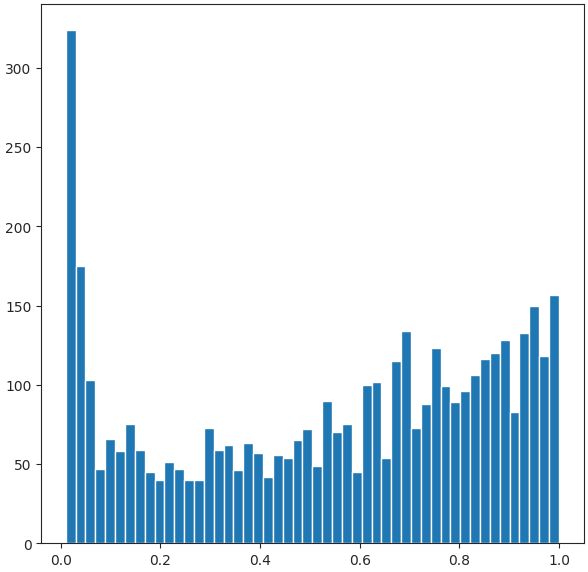

In [1172]:
plt.hist(varDict[6]["SpatialFDR"],bins=50)

(array([219.,  45.,  34.,  40.,  41.,  38.,  37.,  33.,  29.,  22.,  12.,
         19.,  34.,  24.,  13.,  18.,  27.,  24.,  27.,  33.,  13.,  18.,
         12.,   7.,  21.,  31.,  20.,   9.,  25.,  26.,  29.,  23.,  15.,
         21.,  18.,  20.,  34.,  30.,  25.,  15.,  34.,  28.,  36.,  26.,
         20.,  29.,  20.,  54.,  21.,  23.,  24.,  33.,  16.,  42.,  45.,
         44.,  16.,  63.,  49.,  17.,  18.,  43.,  38.,  34.,  66.,  39.,
         26.,  27.,  59.,  34.,  77.,  71.,  46.,  42.,  46.,  88.,  33.,
         39.,  81.,  34.,  70.,  55.,  55.,  45.,  72., 102.,  64., 121.,
         70.,  91.,  93.,  25.,  20.,  56., 117.,  89.,  67.,  66., 151.,
        141.]),
 array([0.07034904, 0.07964436, 0.08893968, 0.098235  , 0.10753031,
        0.11682563, 0.12612095, 0.13541626, 0.14471158, 0.1540069 ,
        0.16330221, 0.17259753, 0.18189285, 0.19118817, 0.20048348,
        0.2097788 , 0.21907412, 0.22836943, 0.23766475, 0.24696007,
        0.25625539, 0.2655507 , 0.27484602, 0.

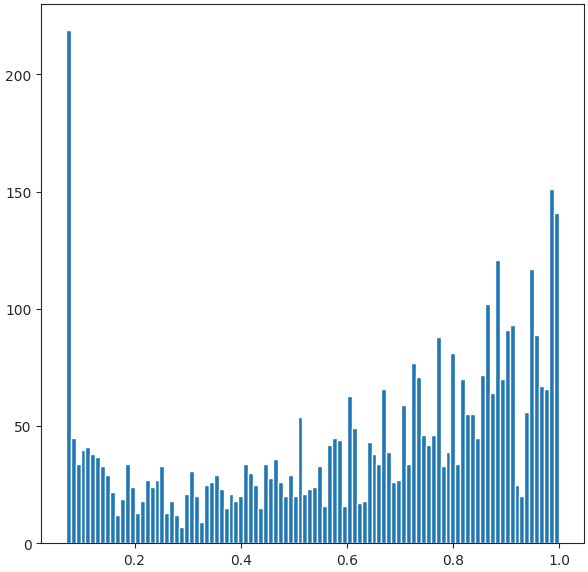

In [1256]:
plt.hist(varDict[7]["SpatialFDR"],bins=100)

In [1263]:
sum(varDict[7]["SpatialFDR"]<0.1)

303

In [1188]:
null_bk_1=null_bk.copy()

In [1189]:
milo2.make_nhoods(null_bk, prop=0.3)

In [1190]:
null.obsm["nhoods"]=null_bk.obsm["nhoods"]
null.obs[["nhood_ixs_refined","nhood_kth_distance","nhood_ixs_random"]]=null_bk.obs[["nhood_ixs_refined","nhood_kth_distance","nhood_ixs_random"]]
null.uns=null_bk.uns

In [1191]:
lenthDFDict2={}
pValDict2={}
varDict2={}
for i in range(pseudo_name.shape[1]):
    print(f"working on {i} data")
    null=null_bk.copy()
    pseudo_loop=pseudo_name.iloc[:,i]
    null.obs["Sample"]=np.vectorize(cellSampleDict.get)(pseudo_loop)
    null.obs["Stage"]=np.vectorize(cellStageDict.get)(pseudo_loop)
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="Sample")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=10)
    milo2.make_range(nulldata,time_col="dpt_pred")
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict2[i]=lenDf_loop
    varDict2[i]=nulldata["milo"].var
    pValDict2[i]=nulldata["milo"].uns["overall_p_val"]

working on 0 data

Make differential_test.......

Make null datasets.......

working on 1 data

Make differential_test.......

Make null datasets.......

working on 2 data

Make differential_test.......

Make null datasets.......

working on 3 data

Make differential_test.......

Make null datasets.......

working on 4 data

Make differential_test.......

Make null datasets.......

working on 5 data

Make differential_test.......

Make null datasets.......

working on 6 data

Make differential_test.......

Make null datasets.......

working on 7 data

Make differential_test.......

Make null datasets.......

working on 8 data

Make differential_test.......

Make null datasets.......

working on 9 data

Make differential_test.......

Make null datasets.......

working on 10 data

Make differential_test.......

Make null datasets.......

In [1247]:
def test_whole(varTable,
                     times:int = 10):
        varTable=varTable.dropna()
        sumVal=varTable.shape[0]
        trueVal=sum(varTable["Accept"])
        nullVal=sum(varTable["null"])
        if nullVal==0:
            nullVal=1/(sumVal*times)
        else:
            nullVal=nullVal/(sumVal)
        pval=1- binom.cdf(trueVal, sumVal, nullVal)
        if trueVal == 0:
            pval=1
        return(pval)
def return_true(varTable,
                     times:int = 10):
        varTable=varTable.dropna()
        varTable["Accept"]
        sumVal=varTable.shape[0]
        trueVal=sum(varTable["Accept"])
        nullVal=sum(varTable["null"])
        return(trueVal/sumVal)

In [1260]:
varDict2[7]

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,null,time,range_down,range_up,Accept,logChange
index_cell,,,,,,,,,,,,,,
BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG-1_6-0-2,BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG...,1.592432,0.464478,7.737632,2.680136,0.103428,0.397462,0.420435,0.0,0.301083,0.259997,0.344450,False,3.593959
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_ACAGCTACACTTACGA-1_1-0-2,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...,0.936314,-0.014571,8.212349,0.002552,0.959769,0.991244,0.992347,0.0,0.043012,0.036035,0.072043,False,-0.119659
TCCATCGCAGCAAGAC-1_1-1-2,TCCATCGCAGCAAGAC-1_1-1-2,1.555860,0.917058,7.636195,6.048358,0.016660,0.154059,0.160769,0.0,0.716801,0.737592,0.830175,False,7.002836
BmscSpecification_Kishor_1_ATCCACCAGGACAGAA_1-0-2,BmscSpecification_Kishor_1_ATCCACCAGGACAGAA_1-0-2,0.990178,-0.056992,8.056006,0.035428,0.850995,0.955113,0.959989,0.0,0.052769,0.034204,0.066592,False,-0.459125
Bmsc2019_Regev_samp2_baryawno:std2_GGATTACCAGCGTTCG-0-2,Bmsc2019_Regev_samp2_baryawno:std2_GGATTACCAGC...,1.038132,-0.347948,7.810806,1.350215,0.246844,0.594082,0.619890,0.0,0.082492,0.043030,0.080092,False,-2.717758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Septoclasts_Kishor_Pdgfra_CTCTCGATCTTGGTGA_3-0-2,Septoclasts_Kishor_Pdgfra_CTCTCGATCTTGGTGA_3-0-2,1.765353,0.257393,7.441207,0.720936,0.397013,0.719786,0.741618,0.0,0.291599,0.285514,0.353927,False,1.915314
BmscTime_Zhong_1.5M_GGGAGATTCACGACTA_2-0-2,BmscTime_Zhong_1.5M_GGGAGATTCACGACTA_2-0-2,0.928025,0.282133,7.979015,0.969864,0.326092,0.665079,0.690421,0.0,0.056191,0.034640,0.071319,False,2.251145
Ablation_Matsushita_abl7con1_GTAACTGTCTATCGCC-1_2-0-2,Ablation_Matsushita_abl7con1_GTAACTGTCTATCGCC-...,1.083056,-0.182187,7.415874,0.369096,0.544295,0.812644,0.828747,0.0,0.037281,0.036980,0.069524,False,-1.351074


In [1253]:
p_result = {key: test_whole(value) for key, value in varDict2.items()}
true_result = {key: return_true(value) for key, value in varDict2.items()}
trajDiffmetric=pd.DataFrame(list(zip(p_result.values(), true_result.values())), columns=['p', 'ratio'], index=true_result.keys())

In [1254]:
trajDiffmetric

,p,ratio
0,0.0,0.149084
1,0.0,0.192904
2,0.0,0.193609
3,0.0,0.210879
4,0.0,0.177514
5,0.0,0.158012
6,0.0,0.111725
7,1.0,0.000000
8,1.0,0.000000
9,1.0,0.000000


In [1411]:
trajDiffmetric.to_csv("../processed_data/11.23_process_null/11.23_trajdiff_gradiant_metrics.csv")


In [1430]:
lenthDFDict2[1]

,true,false,meanLogChange,null,rate,binom_p
0,0.0,0.0,NaN,NaN,NaN,1.000000
1,7.0,403.0,-2.446612,0.016477,0.017073,0.364629
2,108.0,1993.0,-3.267147,0.007704,0.051404,0.000000
3,251.0,3486.0,-2.849552,0.010964,0.067166,0.000000
4,427.0,3299.0,-4.197774,0.030576,0.114600,0.000000
...,...,...,...,...,...,...
95,3.0,37.0,5.689735,0.002500,0.075000,0.000003
96,2.0,36.0,4.956266,0.002632,0.052632,0.000143
97,2.0,33.0,4.556770,0.002857,0.057143,0.000143
98,1.0,33.0,4.282919,0.002941,0.029412,0.004559


In [1420]:
logFcTab = {key: value["meanLogChange"] for key, value in lenthDFDict2.items()}
logFcTab=pd.DataFrame(logFcTab)
logFcTab=logFcTab.dropna()
PyComplexHeatmap.heatmap(logFcTab.T)
plt.savefig("../result/11.24_benchmark_composition/grad_logFC_heatmap.pdf")

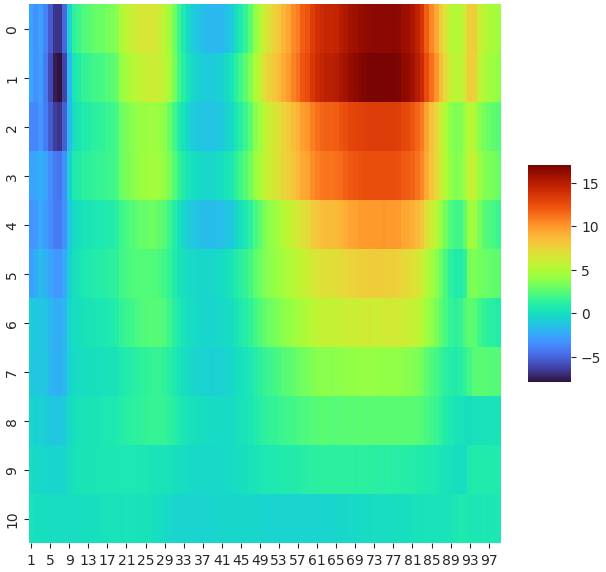

In [1442]:
acceptTab = {key: (-np.log(value["binom_p"]+0.001)).astype(int) for key, value in lenthDFDict2.items()}
acceptTab=pd.DataFrame(acceptTab)
PyComplexHeatmap.heatmap(acceptTab.T)
plt.savefig("../result/11.24_benchmark_composition/grad_FDR_heatmap.pdf")

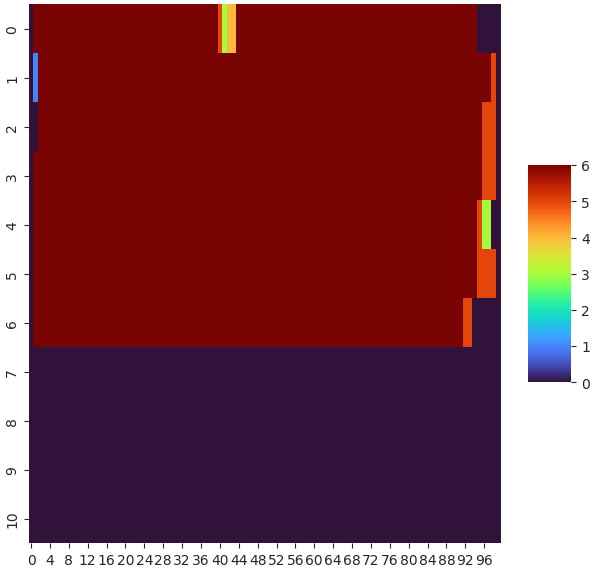

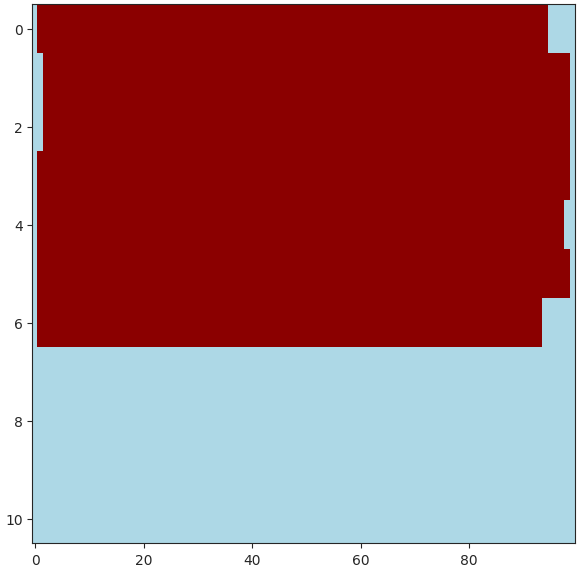

In [1441]:
color1 = 'lightblue'
color2 = 'darkred'

# Set up a diverging color map with only two colors
cmap = plt.cm.colors.ListedColormap([color1, color2])

# Plot the heatmap
plt.imshow(acceptTab.T, cmap=cmap, aspect='auto')


In [ ]:
def return_FC(lenDf):
        varTable=varTable.dropna()
        varTable["Accept"]
        sumVal=varTable.shape[0]
        trueVal=sum(varTable["Accept"])
        nullVal=sum(varTable["null"])
        return(trueVal/sumVal)

In [1419]:
lenthDFDict2[1]["meanLogChange"]

0          NaN
1    -2.446612
2    -3.267147
3    -2.849552
4    -4.197774
        ...   
95    5.689735
96    4.956266
97    4.556770
98    4.282919
99    3.951233
Name: meanLogChange, Length: 100, dtype: float64

In [1245]:
pd.DataFrame(p_result)

0.0

In [1281]:
lenthDFDict3={}
pValDict3={}
varDict3={}
for i in range(pseudo_name.shape[1]):
    print(f"working on {i} data")
    null=null_bk_1.copy()
    pseudo_loop=pseudo_name.iloc[:,i]
    null.obs["Sample"]=np.vectorize(cellSampleDict.get)(pseudo_loop)
    null.obs["Stage"]=np.vectorize(cellStageDict.get)(pseudo_loop)
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="Sample")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=10,FDR=0.1)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.1)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict3[i]=lenDf_loop
    varDict3[i]=nulldata["milo"].var
    pValDict3[i]=nulldata["milo"].uns["overall_p_val"]

working on 0 data

Make differential_test.......

Make null datasets.......

working on 1 data

Make differential_test.......

Make null datasets.......

working on 2 data

Make differential_test.......

Make null datasets.......

working on 3 data

Make differential_test.......

Make null datasets.......

working on 4 data

Make differential_test.......

Make null datasets.......

working on 5 data

Make differential_test.......

Make null datasets.......

working on 6 data

Make differential_test.......

Make null datasets.......

working on 7 data

Make differential_test.......

Make null datasets.......

working on 8 data

Make differential_test.......

Make null datasets.......

working on 9 data

Make differential_test.......

Make null datasets.......

working on 10 data

Make differential_test.......

Make null datasets.......

In [1278]:
sum(varDict3[7]["Accept"])

0

## shuffle

In [1282]:
condition_shuffle=pd.read_csv("../processed_data/11.23_process_null/11.23_shuffle_condition.csv",index_col=0)

In [1286]:
condition_shuffle.iloc[:,1].values

array(['Steady', 'Steady', 'Steady', ..., 'Steady', 'Steady', 'Steady'],
      dtype=object)

In [1288]:
null.obs["Stage"]

Unnamed: 0
BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA-1_6-0-2                     Steady
BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG-1_5-0-2                     Steady
BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAATTCC-1_3-0-2                  Steady
Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCACAGGCC-0-2                    Steady
BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2                          Steady
                                                                            ...  
TAACTTCAGCGCACAA-1_3-1-2                                                   Steady
PerichondrialP21_Matsushita_HesCreCxcl12GfpP21_GGGATGATCTTTACGT-1_2-0-2    Steady
Septoclasts_Kishor_Pdgfra_GACCAATCAGGAACCA_3-0-2                           Steady
BmscTime_Zhong_16M_CCCGGAATCGAGTGGA_4-0-2                                  Steady
BmscSpecification_Kishor_2_ACATACGCACTCGACG_2-0-2                          Steady
Name: Stage, Length: 64107, dtype: object

In [1291]:
null_bk_1.obs_names

Index(['BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA-1_6-0-2',
       'BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG-1_5-0-2',
       'BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAATTCC-1_3-0-2',
       'Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCACAGGCC-0-2',
       'BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2',
       'Ablation_Matsushita_abl7con2_CTCCCAACAGCAGTCC-1_3-0-2',
       'BmscEndosteal_Ono_Prrx1creP21_TATATCCGTACAATAG-1_6-0-2',
       'Ablation_Matsushita_abl7con2_GCCAACGTCATGCATG-1_3-0-2',
       'Ablation_Matsushita_cxcl2_TCATACTAGATGGCGT-1_7-0-2',
       'BmscTime_Zhong_1.5M_TAGCCGGAGGTGCTAG_2-0-2',
       ...
       'Septoclasts_Kishor_Pdgfra_GAGTGAGTCGGAATTC_3-0-2',
       'Bmsc2019_Regev_bm1_CACACAAGTAGGGTAC-1_1-0-2',
       'Ablation_Matsushita_cxcl1_TTCTTCCGTTGTATGC-1_6-0-2',
       'Septoclasts_Kishor_Pdgfra_CGCGTGAGTTTCACAG_3-0-2',
       'Ablation_Matsushita_cxcl2_CGGGACTAGTCAACAA-1_7-0-2',
       'TAACTTCAGCGCACAA-1_3-1-2',
       'PerichondrialP21_Mats

In [1380]:
condition_shuffle

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
Ablation_Matsushita_abl7con1_AAACCTGCAAAGGCGT-1_2-0-2,Steady,Steady,Steady,Steady,Steady,Development,Development,Development,Steady,Steady
Ablation_Matsushita_abl7con1_AAACGGGGTGTTCGAT-1_2-0-2,Steady,Steady,Steady,Steady,Steady,Development,Development,Development,Steady,Steady
Ablation_Matsushita_abl7con1_AAACGGGTCGCCTGTT-1_2-0-2,Steady,Steady,Steady,Steady,Steady,Development,Development,Development,Steady,Steady
Ablation_Matsushita_abl7con1_AAAGATGCAATGTAAG-1_2-0-2,Steady,Steady,Steady,Steady,Steady,Development,Development,Development,Steady,Steady
Ablation_Matsushita_abl7con1_AAAGATGGTCGATTGT-1_2-0-2,Steady,Steady,Steady,Steady,Steady,Development,Development,Development,Steady,Steady
...,...,...,...,...,...,...,...,...,...,...
TTTCGATTCCTCTAAT-1_5-1-2,Steady,Steady,Steady,Development,Development,Steady,Development,Development,Steady,Development
TTTCGATTCTGGTGCG-1_5-1-2,Steady,Steady,Steady,Development,Development,Steady,Development,Development,Steady,Development
TTTGACTGTATTTCCT-1_5-1-2,Steady,Steady,Steady,Development,Development,Steady,Development,Development,Steady,Development
TTTGGAGCAGCGACAA-1_5-1-2,Steady,Steady,Steady,Development,Development,Steady,Development,Development,Steady,Development


In [1294]:
null_bk_2=null_bk_1[condition_shuffle.index]

In [1379]:
pseudo_name

,0,1,2,3,4,5,6,7,8,9,10
BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA-1_6-0-2,BmscEndosteal_Ono_Prrx1creP21_CACAGATGTGCCCGTA...,Septoclasts_Kishor_Longbone2_TCACTATGTGCTCTTC_...,BmscEndosteal_Ono_Fgfr3CEp53cHet_ATTCAGGTCCTAC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,BmscEndosteal_Ono_Prrx1creP21_TGCACGGGTCGAATTC...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cKO_AGACCCGTCTGACC...,BmscEndosteal_Ono_Fgfr3CEp53cKO_AGACCCGTCTGACC...
BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG-1_5-0-2,BmscEndosteal_Ono_Prrx1cre18M_ACTCCCAGTCTGTTAG...,Septoclasts_Kishor_Pdgfra_TAACGACGTAGTTAGA_3-0-2,Septoclasts_Kishor_Pdgfra_GTCTTTACATAATCCG_3-0-2,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Ablation_Matsushita_cxcl2_TGCGGGTGTCTGTCCT-1_7...,Ablation_Matsushita_cxcl2_TGCGGGTGTCTGTCCT-1_7...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cKO_TGGTTAGCAAATTA...
BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAATTCC-1_3-0-2,BmscEndosteal_Ono_Fgfr3CEp53cHet_TCATACTAGCAAT...,Septoclasts_Kishor_Pdgfra_GTCTTTACATAATCCG_3-0-2,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Bmsc2019_Regev_bm3_GCATGATTCGCTAGCG-1_3-0-2,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...
Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCACAGGCC-0-2,Bmsc2019_Regev_samp1_baryawno:std1_CATATGGTCAC...,BmscEndosteal_Ono_Prrx1cre18M_TCACATTAGGTCATTC...,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Prrx1creP21_GCATCGGAGGAAGTAG...,Bmsc2019_Regev_bm4_GCAAACTGTGCCTTGG-1_4-0-2,Bmsc2019_Regev_bm4_GCAAACTGTGCCTTGG-1_4-0-2,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...,BmscEndosteal_Ono_Prrx1cre18M_ACGTAGTCATCGATGT...
BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2,BmscSpecification_Kishor_3_ATTCTACAGATCCTGT_3-0-2,CACTGGGTCACGGGAA-1_3-1-2,Bmsc2019_Regev_samp3_baryawno:std3_AAGTCTGGTAT...,Septoclasts_Kishor_Pdgfra_TATCTTGTCAGAGCGA_3-0-2,Ablation_Matsushita_abl7con2_CTCATTACAGACGGAT-...,BmscEndosteal_Ono_Fgfr3CEp53cHet_GGGAGATTCTTAG...,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,Septoclasts_Kishor_Pdgfra_CATCGCTCAGTGTATC_3-0-2,BmscEndosteal_Ono_Prrx1cre18M_GTCGTTCGTCCTTTGC...,Septoclasts_Kishor_Longbone1_CAGAGCCAGACATCAA_...
...,...,...,...,...,...,...,...,...,...,...,...
TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,TAACTTCAGCGCACAA-1_3-1-2,Bmsc2019_Regev_samp6_baryawno:std8_ATTGGACGTTA...
PerichondrialP21_Matsushita_HesCreCxcl12GfpP21_GGGATGATCTTTACGT-1_2-0-2,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...,BmscTime_Zhong_16M_CCGATCTGTCGAGTGA_4-0-2
Septoclasts_Kishor_Pdgfra_G

In [1381]:
#== for shuffle purpose
lenthDFDict4={}
pValDict4={}
varDict4={}
for i in range(condition_shuffle.shape[1]):
    print(f"working on {i} data")
    null=null_bk_2.copy()
    condition_loop=condition_shuffle.iloc[:,i]
    null.obs["Stage"]=condition_loop.values
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="Sample")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=3,FDR=0.01)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.01)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=3)
    milo2.test_whole(nulldata)
    lenthDFDict4[i]=lenDf_loop
    varDict4[i]=nulldata["milo"].var
    pValDict4[i]=nulldata["milo"].uns["overall_p_val"]

working on 0 data

Make differential_test.......

Make null datasets.......

working on 1 data

Make differential_test.......

Make null datasets.......

working on 2 data

Make differential_test.......

Make null datasets.......

working on 3 data

Make differential_test.......

Make null datasets.......

working on 4 data

Make differential_test.......

Make null datasets.......

working on 5 data

Make differential_test.......

Make null datasets.......

working on 6 data

Make differential_test.......

Make null datasets.......

working on 7 data

Make differential_test.......

Make null datasets.......

working on 8 data

Make differential_test.......

Make null datasets.......

working on 9 data

Make differential_test.......

Make null datasets.......

In [1382]:
pValDict4

{0: 0.022205363284210633,
 1: 1,
 2: 0.999999999999935,
 3: 0.42704225496868853,
 4: 0.9410812967358234,
 5: 1,
 6: 0.0,
 7: 1,
 8: 1,
 9: 0.0}

In [1383]:
sum(varDict4[2]["SpatialFDR"]<0.01)

19

In [1385]:
sum(varDict4[9]["Accept"])

67

In [1349]:
sum(varDict4[6]["SpatialFDR"]<0.01)

176

In [1368]:
sum(varDict4[6]["SpatialFDR"]<0.01)

176

In [1366]:
sum(varDict4[6]["null"])

230.59999999999565

In [1342]:
def test_whole(varTable,
                     times:int = 10):
        varTable=varTable.dropna()
        sumVal=varTable.shape[0]
        trueVal=sum(varTable["FDR"]<0.01)
        nullVal=sum(varTable["null"])
        if nullVal==0:
            nullVal=1/(sumVal*times)
        else:
            nullVal=nullVal/(sumVal)
        pval=1- binom.cdf(trueVal, sumVal, nullVal)
        if trueVal == 0:
            pval=1
        return(pval)

In [1343]:
p_result_4 = {key: test_whole(value) for key, value in varDict4.items()}

In [1344]:
p_result_4

{0: 0.9999999999998973,
 1: 1,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 0.999928055922544,
 7: 1,
 8: 1,
 9: 1.0}

In [1345]:
p_result_2 = {key: test_whole(value) for key, value in varDict2.items()}

In [1347]:
p_result_3 = {key: test_whole(value) for key, value in varDict3.items()}

In [1378]:
sum(lenthDFDict4[9]["binom_p"]<0.05)

12

In [1386]:
new_assign=pd.read_csv("../processed_data/11.23_process_null/11.23_shuffle_condition_newassign.csv",index_col=0)

In [1387]:
new_assign

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,random_sample
Ablation_Matsushita_abl7con1_AAACCTGCAAAGGCGT-1_2-0-2,Development,Development,Development,Development,Steady,Development,Development,Steady,Development,Steady,40
Ablation_Matsushita_abl7con1_AAACGGGGTGTTCGAT-1_2-0-2,Development,Steady,Steady,Development,Development,Development,Development,Steady,Steady,Steady,39
Ablation_Matsushita_abl7con1_AAACGGGTCGCCTGTT-1_2-0-2,Steady,Development,Steady,Steady,Development,Development,Steady,Steady,Development,Development,37
Ablation_Matsushita_abl7con1_AAAGATGCAATGTAAG-1_2-0-2,Development,Development,Development,Steady,Steady,Development,Steady,Development,Development,Steady,26
Ablation_Matsushita_abl7con1_AAAGATGGTCGATTGT-1_2-0-2,Steady,Development,Steady,Steady,Development,Development,Development,Steady,Steady,Steady,22
...,...,...,...,...,...,...,...,...,...,...,...
TTTCGATTCCTCTAAT-1_5-1-2,Development,Steady,Development,Development,Development,Development,Development,Steady,Development,Development,1
TTTCGATTCTGGTGCG-1_5-1-2,Development,Development,Steady,Development,Development,Steady,Development,Steady,Development,Development,5
TTTGACTGTATTTCCT-1_5-1-2,Development,Steady,Steady,Development,Development,Development,Steady,Steady,Development,Steady,8
TTTGGAGCAGCGACAA-1_5-1-2,Development,Development,Steady,Development,Development,Steady,Development,Steady,Development,Development,5


In [1390]:
condition_assign=new_assign.iloc[:,0:10]

In [1392]:
null_bk_2.obs["random"]=new_assign['random_sample']

In [1394]:
#== for shuffle purpose
lenthDFDict5={}
pValDict5={}
varDict5={}
for i in range(new_assign.shape[1]):
    print(f"working on {i} data")
    null=null_bk_2.copy()
    condition_loop=condition_assign.iloc[:,i]
    null.obs["Stage"]=condition_loop.values
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="random")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=5,FDR=0.01)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.01)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict5[i]=lenDf_loop
    varDict5[i]=nulldata["milo"].var
    pValDict5[i]=nulldata["milo"].uns["overall_p_val"]

working on 0 data

Make differential_test.......

Make null datasets.......

working on 1 data

Make differential_test.......

Make null datasets.......

working on 2 data

Make differential_test.......

Make null datasets.......

working on 3 data

Make differential_test.......

Make null datasets.......

working on 4 data

Make differential_test.......

Make null datasets.......

working on 5 data

Make differential_test.......

Make null datasets.......

working on 6 data

Make differential_test.......

Make null datasets.......

working on 7 data

Make differential_test.......

Make null datasets.......

working on 8 data

Make differential_test.......

Make null datasets.......

working on 9 data

Make differential_test.......

Make null datasets.......

working on 10 data

IndexError: single positional indexer is out-of-bounds

In [ ]:
lenthDFDict5

In [1408]:
sum(varDict5[6]["Accept"])

0

In [1412]:
pValDict5

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

In [1414]:

true_result5 = {key: return_true(value) for key, value in varDict5.items()}
trajDiffmetric5=pd.DataFrame(list(zip(pValDict5.values(), true_result5.values())), columns=['p', 'ratio'], index=true_result5.keys())

In [1416]:
trajDiffmetric5.to_csv("../processed_data/11.23_process_null/11.24_traj_null.csv")

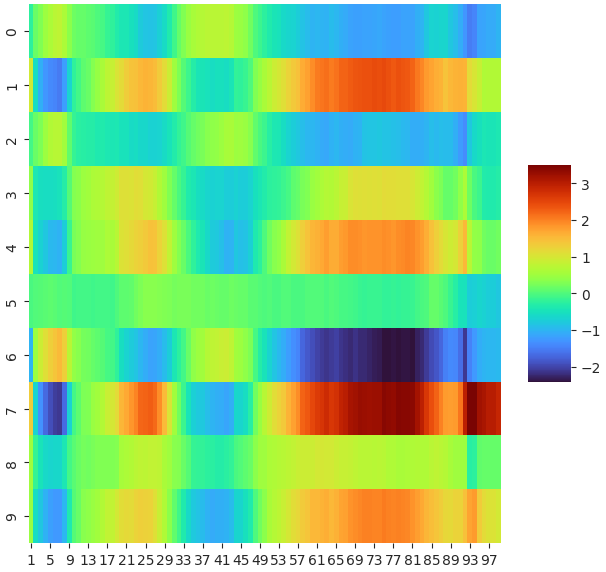

In [1447]:
logFcTab5 = {key: value["meanLogChange"] for key, value in lenthDFDict5.items()}
logFcTab5=pd.DataFrame(logFcTab5)
logFcTab5=logFcTab5.dropna()
PyComplexHeatmap.heatmap(logFcTab5.T)
plt.savefig("../result/11.24_benchmark_composition/grad_logFC_heatmap_null.pdf")

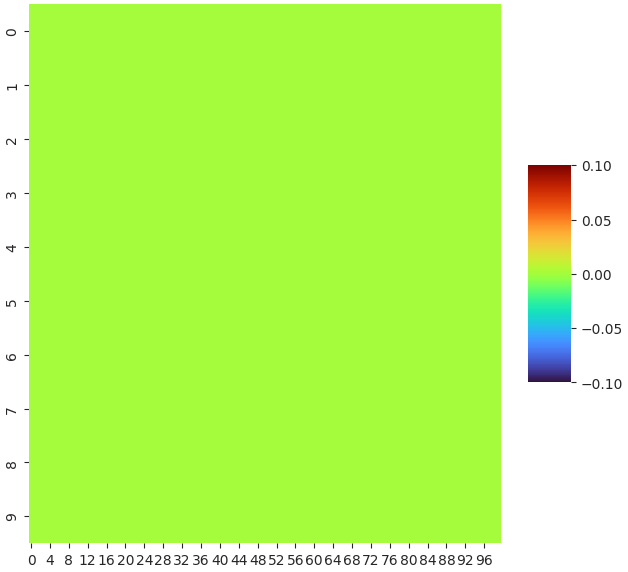

In [1448]:
acceptTab5 = {key: (-np.log(value["binom_p"]+0.001)).astype(int) for key, value in lenthDFDict5.items()}
acceptTab5=pd.DataFrame(acceptTab5)
PyComplexHeatmap.heatmap(acceptTab5.T)
plt.savefig("../result/11.24_benchmark_composition/grad_FDR_heatmap_null.pdf")

In [1453]:
dpt_bin=pd.read_csv("../../important_processed_data/11.19_lightGBM_pred_and_orig.csv",index_col=0)

In [1459]:
null

AnnData object with n_obs × n_vars = 64107 × 17312
    obs: 'Sample', 'Stage', 'Stage_shuffle', 'dpt_pred', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance', 'random'
    uns: 'neighbors', 'nhood_neighbors_key'
    obsm: 'X_draw_graph_fa', 'X_umap', 'X_scANVI', 'nhoods'
    obsp: 'connectivities', 'distances'

In [1501]:
null_bk_2.obs["dpt_bin"]=dpt_bin.loc[null.obs_names]["dpt_bin"]

In [1552]:
sum(null.obs["dpt_bin"]==8)

2728

In [1489]:
select_name=null.obs_names[(null.obs["dpt_bin"]==10)&(null.obs["Stage"]=="Development")]
# Calculate the number of elements to select (40%)
percentage_to_select = 0.4
num_elements_to_select = int(len(select_name) * percentage_to_select)

# Randomly select elements
random_sample = random.sample(list(select_name.values), num_elements_to_select)
null.obs.isin(random_sample)

In [1500]:
null[~null.obs_names.isin(random_sample)]

View of AnnData object with n_obs × n_vars = 63471 × 17312
    obs: 'Sample', 'Stage', 'Stage_shuffle', 'dpt_pred', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance', 'random', 'dpt_bin'
    uns: 'neighbors', 'nhood_neighbors_key'
    obsm: 'X_draw_graph_fa', 'X_umap', 'X_scANVI', 'nhoods'
    obsp: 'connectivities', 'distances'

In [ ]:
for i in set(null.obs["dpt_bin"])

In [1549]:
sum(null.obs["nhood_ixs_refined"]!=5)

63061

In [1557]:
null.shape[1]

17312

In [1564]:
from scipy.stats import rankdata
import math
# Get the ranks
null_bk_2.obs["rank"] = rankdata(null_bk_2.obs["dpt_pred"])
null_bk_2.obs["rank"] = np.floor(null_bk_2.obs["rank"]/null.shape[0] * 10)

In [1565]:
null_bk_2.obs["rank"]

Unnamed: 0
Ablation_Matsushita_abl7con1_AAACCTGCAAAGGCGT-1_2-0-2    2.0
Ablation_Matsushita_abl7con1_AAACGGGGTGTTCGAT-1_2-0-2    4.0
Ablation_Matsushita_abl7con1_AAACGGGTCGCCTGTT-1_2-0-2    2.0
Ablation_Matsushita_abl7con1_AAAGATGCAATGTAAG-1_2-0-2    2.0
Ablation_Matsushita_abl7con1_AAAGATGGTCGATTGT-1_2-0-2    6.0
                                                        ... 
TTTCGATTCCTCTAAT-1_5-1-2                                 7.0
TTTCGATTCTGGTGCG-1_5-1-2                                 9.0
TTTGACTGTATTTCCT-1_5-1-2                                 6.0
TTTGGAGCAGCGACAA-1_5-1-2                                 9.0
TTTGGTTCACTACTTT-1_5-1-2                                 8.0
Name: rank, Length: 64107, dtype: float64

In [1570]:
#== for shuffle purpose
lenthDFDict6={}
pValDict6={}
varDict6={}
for i in set(null_bk_2.obs["rank"]):
    print(f"working on {i} data")
    null=null_bk_2.copy()
    condition_loop=condition_assign.iloc[:,1]
    null.obs["Stage"]=condition_loop.values
    select_name=null.obs_names[(null.obs["rank"]==i)&(null.obs["Stage"]=="Development")&(null.obs["nhood_ixs_refined"]!=1)]
    # Calculate the number of elements to select (40%)
    percentage_to_select = 1
    num_elements_to_select = int(len(select_name) * percentage_to_select) 
    # Randomly select elements
    random_sample = random.sample(list(select_name.values), num_elements_to_select)
    null=null[~null.obs_names.isin(random_sample)]
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="random")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=3,FDR=0.05)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.05)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict6[i]=lenDf_loop
    varDict6[i]=nulldata["milo"].var
    pValDict6[i]=nulldata["milo"].uns["overall_p_val"]

working on 0.0 data

Make differential_test.......

Make null datasets.......

working on 1.0 data

Make differential_test.......

Make null datasets.......

working on 2.0 data

Make differential_test.......

Make null datasets.......

working on 3.0 data

Make differential_test.......

Make null datasets.......

working on 4.0 data

Make differential_test.......

Make null datasets.......

working on 5.0 data

Make differential_test.......

Make null datasets.......

working on 6.0 data

Make differential_test.......

Make null datasets.......

working on 7.0 data

Make differential_test.......

Make null datasets.......

working on 8.0 data

Make differential_test.......

Make null datasets.......

working on 9.0 data

Make differential_test.......

Make null datasets.......

working on 10.0 data

Make differential_test.......

Make null datasets.......

In [1522]:
pValDict6

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0}

In [1543]:
sum(varDict6[9]["SpatialFDR"]<0.5)

773

In [1523]:
sum(varDict6[1]["SpatialFDR"]<0.05)

40

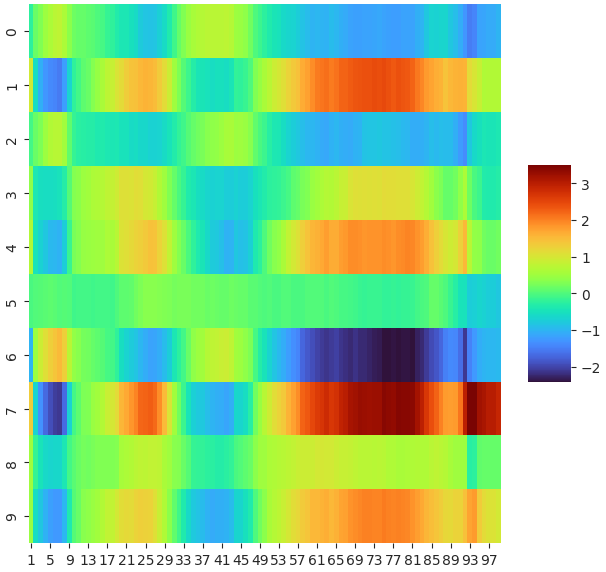

In [1571]:
logFcTab6 = {key: value["meanLogChange"] for key, value in lenthDFDict6.items()}
logFcTab6=pd.DataFrame(logFcTab6)
logFcTab6=logFcTab5.dropna()
PyComplexHeatmap.heatmap(logFcTab6.T)
plt.savefig("../result/11.24_benchmark_composition/grad_logFC_heatmap_spike.pdf")

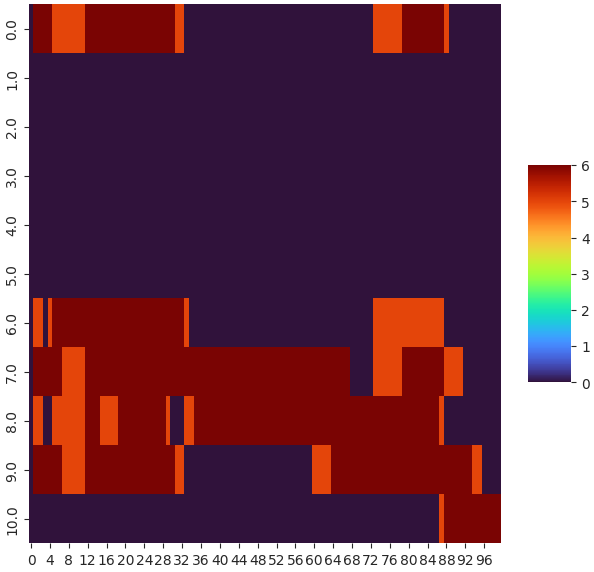

In [1572]:
acceptTab6 = {key: (-np.log(value["binom_p"]+0.001)).astype(int) for key, value in lenthDFDict6.items()}
acceptTab6=pd.DataFrame(acceptTab6)
PyComplexHeatmap.heatmap(acceptTab6.T)
plt.savefig("../result/11.24_benchmark_composition/grad_FDR_heatmap_null_spike.pdf")

(array([41284.,     0.,  7760.,     0.,     0.,  3165.,     0.,  4416.,
            0.,  7482.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

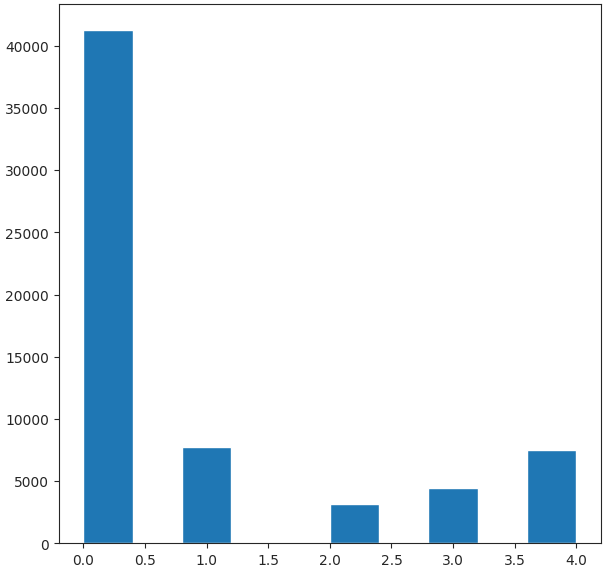

In [1583]:
plt.hist(null_bk_2.obs["dpt_5_bin"])

In [1582]:
null_bk_2.obs["dpt_5_bin"] = np.floor(null_bk_2.obs["dpt_pred"] * 5)
null_bk_2.obs["dpt_5_bin"][null_bk_2.obs["dpt_5_bin"]==5] = 4

In [1578]:
#== for shuffle purpose
lenthDFDict7={}
pValDict7={}
varDict7={}
for i in set(null_bk_2.obs["dpt_5_bin"]):
    print(f"working on {i} data")
    null=null_bk_2.copy()
    condition_loop=condition_assign.iloc[:,1]
    null.obs["Stage"]=condition_loop.values
    select_name=null.obs_names[(null.obs["dpt_5_bin"]==i)&(null.obs["Stage"]=="Development")&(null.obs["nhood_ixs_refined"]!=1)]
    # Calculate the number of elements to select (40%)
    percentage_to_select = 0.8
    num_elements_to_select = int(len(select_name) * percentage_to_select) 
    # Randomly select elements
    random_sample = random.sample(list(select_name.values), num_elements_to_select)
    null=null[~null.obs_names.isin(random_sample)]
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="random")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=3,FDR=0.05)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.05)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict7[i]=lenDf_loop
    varDict7[i]=nulldata["milo"].var
    pValDict7[i]=nulldata["milo"].uns["overall_p_val"]

working on 0.0 data

Make differential_test.......

Make null datasets.......

working on 1.0 data

Make differential_test.......

Make null datasets.......

working on 2.0 data

Make differential_test.......

Make null datasets.......

working on 3.0 data

Make differential_test.......

Make null datasets.......

working on 4.0 data

Make differential_test.......

Make null datasets.......

working on 5.0 data

Make differential_test.......

Make null datasets.......

<AxesSubplot: >

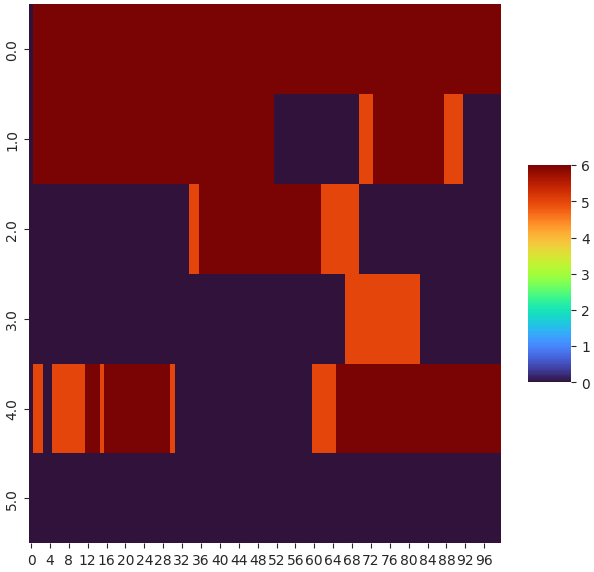

In [1579]:
acceptTab7 = {key: (-np.log(value["binom_p"]+0.001)).astype(int) for key, value in lenthDFDict7.items()}
acceptTab7=pd.DataFrame(acceptTab7)
PyComplexHeatmap.heatmap(acceptTab7.T)

<AxesSubplot: >

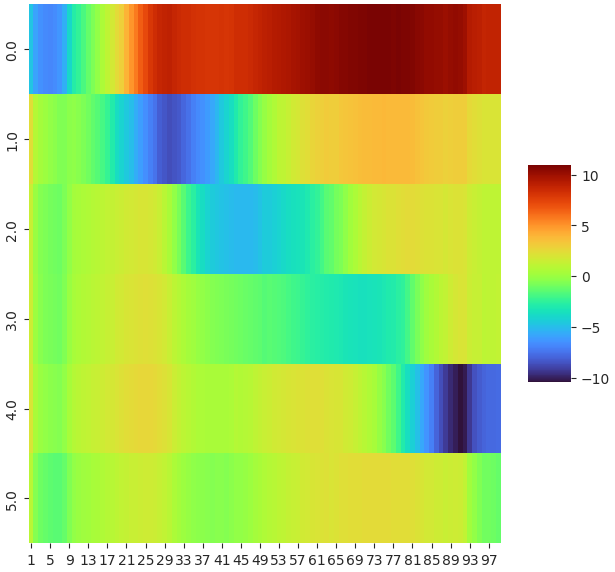

In [1581]:
logFcTab7 = {key: value["meanLogChange"] for key, value in lenthDFDict7.items()}
logFcTab7=pd.DataFrame(logFcTab7)
logFcTab7=logFcTab7.dropna()
PyComplexHeatmap.heatmap(logFcTab7.T)

In [1590]:
#== for shuffle purpose
lenthDFDict8={}
pValDict8={}
varDict8={}
for i in set(null_bk_2.obs["dpt_5_bin"]):
    print(f"working on {i} data")
    null=null_bk_2.copy()
    condition_loop=condition_assign.iloc[:,1]
    null.obs["Stage"]=condition_loop.values
    select_name=null.obs_names[(null.obs["dpt_5_bin"]==i)&(null.obs["Stage"]=="Development")&(null.obs["nhood_ixs_refined"]!=1)]
    # Calculate the number of elements to select (40%)
    percentage_to_select = 0.75
    num_elements_to_select = int(len(select_name) * percentage_to_select) 
    # Randomly select elements
    random_sample = random.sample(list(select_name.values), num_elements_to_select)
    null=null[~null.obs_names.isin(random_sample)]
    nulldata = milo2.load(null)
    nulldata = milo2.count_nhoods(nulldata, sample_col="random")
    print("Make differential_test.......")
    milo2.da_nhoods(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady')
    print("Make null datasets.......")
    milo2.make_null(nulldata, design='~Stage',model_contrasts='StageDevelopment-StageSteady',times=3,FDR=0.05)
    milo2.make_range(nulldata,time_col="dpt_pred",FDR=0.05)
    lenDf_loop=milo2.permute_test_point(nulldata,n=100,include_null=True)
    lenDf_loop=milo2.test_binom(lenDf_loop,times=10)
    milo2.test_whole(nulldata)
    lenthDFDict8[i]=lenDf_loop
    varDict8[i]=nulldata["milo"].var
    pValDict8[i]=nulldata["milo"].uns["overall_p_val"]

working on 0.0 data

Make differential_test.......

Make null datasets.......

working on 1.0 data

Make differential_test.......

Make null datasets.......

working on 2.0 data

Make differential_test.......

Make null datasets.......

working on 3.0 data

Make differential_test.......

Make null datasets.......

working on 4.0 data

Make differential_test.......

Make null datasets.......

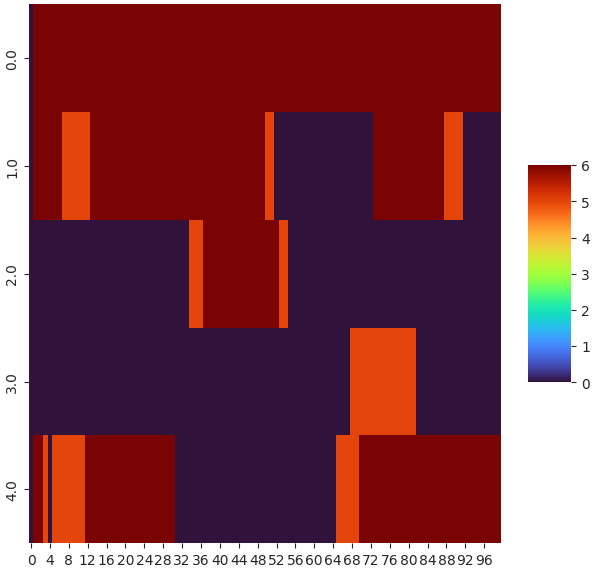

In [1594]:
acceptTab8 = {key: (-np.log(value["binom_p"]+0.001)).astype(int) for key, value in lenthDFDict8.items()}
acceptTab8=pd.DataFrame(acceptTab8)
PyComplexHeatmap.heatmap(acceptTab8.T)
plt.savefig("../result/11.24_benchmark_composition/grad_FDR_heatmap_null_spike.pdf")

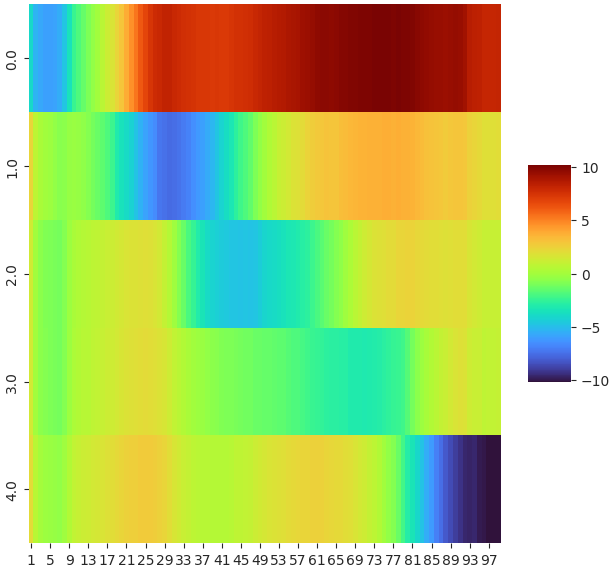

In [1593]:
logFcTab8 = {key: value["meanLogChange"] for key, value in lenthDFDict8.items()}
logFcTab8=pd.DataFrame(logFcTab8)
logFcTab8=logFcTab8.dropna()
PyComplexHeatmap.heatmap(logFcTab8.T)
plt.savefig("../result/11.24_benchmark_composition/grad_logFC_heatmap_null_spike.pdf")

In [1595]:
acceptTab.to_csv("../processed_data/11.23_process_null/11.25_accept_grad.csv")
logFcTab.to_csv("../processed_data/11.23_process_null/11.25_logFC_grad.csv")

acceptTab5.to_csv("../processed_data/11.23_process_null/11.25_accept_null.csv")
logFcTab5.to_csv("../processed_data/11.23_process_null/11.25_logFC_null.csv")
acceptTab8.to_csv("../processed_data/11.23_process_null/11.25_accept_spike.csv")
logFcTab8.to_csv("../processed_data/11.23_process_null/11.25_logFC_spike.csv")

In [1596]:
null_bk_2.write_h5ad("../processed_data/11.23_process_null/11.25_null.h5ad")

In [1602]:
adata.uns["neighbors"]["params"]["use_rep"]

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 150, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'X_scANVI', 'n_pcs': 15}}
With overloaded keys:
	['connectivities', 'distances'].

In [1604]:
adata

AnnData object with n_obs × n_vars = 67329 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei

In [1607]:
import palantir

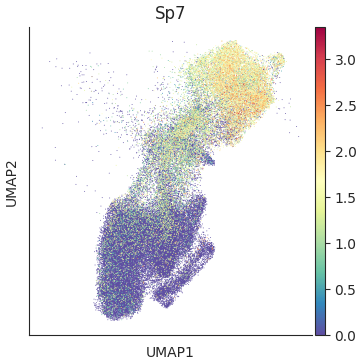

In [1608]:
sc.pl.umap(adata,color="Sp7",use_raw=False)

In [1620]:
adata.var

,features-0,n_cells_by_counts-0,mean_counts-0,log1p_mean_counts-0,pct_dropout_by_counts-0,total_counts-0,log1p_total_counts-0,highly_variable-0,means-0,dispersions-0,...,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,n_cells,RF_highly
0610007N19Rik,0610007N19Rik,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,61078.386719,11.019930,False,0.051725,0.022979,0.007454,0,False,5704,False
0610007P14Rik,0610007P14Rik,15767.0,0.223641,0.201831,85.104534,23672.655466,10.072118,0.0,0.133046,0.249954,...,123761.968750,11.726124,False,0.238195,0.509076,-0.157988,0,False,44695,True
0610009B22Rik,0610009B22Rik,30409.0,0.347876,0.298530,71.271882,36823.016599,10.513906,0.0,0.188494,0.739788,...,119780.578125,11.693425,False,0.224686,0.811211,-0.516921,0,False,53356,False
0610009D07Rik,0610009D07Rik,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,22710.916016,10.030645,False,0.029726,0.021847,0.000805,0,False,4879,False
0610009E02Rik,0610009E02Rik,300.0,0.003130,0.003125,99.716583,331.270360,5.805949,0.0,0.001221,0.128718,...,2181.964600,7.688439,False,0.004934,0.245081,0.010241,2,False,1409,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Ty,mt-Ty,2967.0,0.034974,0.034376,97.197003,3702.000000,8.216899,0.0,0.012450,0.065605,...,4489.834473,8.409794,False,0.005193,0.027136,-0.048117,0,False,2627,False
tdT-WPRE-trans,tdT-WPRE-trans,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,772972.437500,13.558000,False,0.326600,0.070457,0.092797,2,False,33494,True
tdTomato-WPRE-trans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39834.292969,10.592508,False,0.026470,0.024281,0.036881,2,False,2154,False
tdtomato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44333.425781,10.699516,False,0.033914,0.000533,-0.028492,0,False,974,True


In [1621]:
adata

AnnData object with n_obs × n_vars = 67329 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'lei